In [2]:
from pathlib import Path
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!tree ~/Projects/BitSize_ML/

/Users/nejat/Projects/BitSize_ML/
└── end_to_end_ml
    ├── data
    │   └── housing.csv
    ├── images
    │   └── ENV checking.png
    ├── models
    └── notebooks
        ├── 1_setup.ipynb
        ├── 2_fetch_data.ipynb
        ├── 3_overview_EDA.ipynb
        ├── 4_data_split.ipynb
        ├── 5_stratified_split.ipynb
        ├── 6_visualizing_geospatial_data.ipynb
        ├── 7_correlation_pairs.ipynb
        └── 8_feature_engineering.ipynb

6 directories, 10 files


In [4]:
df_path = Path.cwd().parent /"data"/"housing.csv"
df = pd.read_csv(df_path)

In [5]:
def create_income_bins(df):
    df = df.copy()
    df['income_cat'] = pd.cut(df['median_income'],
                              bins=[0,1.5,3, 4.5,6,np.inf],
                              labels=[1,2,3,4,5])
    return df
df_binned = create_income_bins(df)

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=27)
for train_idx, test_idx in split.split(df_binned,df_binned['income_cat']):
    train_strat = df_binned.loc[train_idx].drop(columns=['income_cat'])
    test_strat = df_binned.loc[test_idx].drop(columns=['income_cat'])
print(f"[Stratified], train_size={len(train_strat)}, test_size={len(test_strat)}")

[Stratified], train_size=16512, test_size=4128


In [7]:
housing = train_strat.copy()
corr = housing.corr(numeric_only=True)
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688361
total_rooms           0.132752
housing_median_age    0.104282
households            0.062956
total_bedrooms        0.047036
population           -0.027283
longitude            -0.045971
latitude             -0.143824
Name: median_house_value, dtype: float64

In [8]:
housing.columns.to_list()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [14]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [15]:
housing.columns.to_list()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [17]:
corr = housing.corr(numeric_only=True)
df = corr['median_house_value'].sort_values(ascending=False)

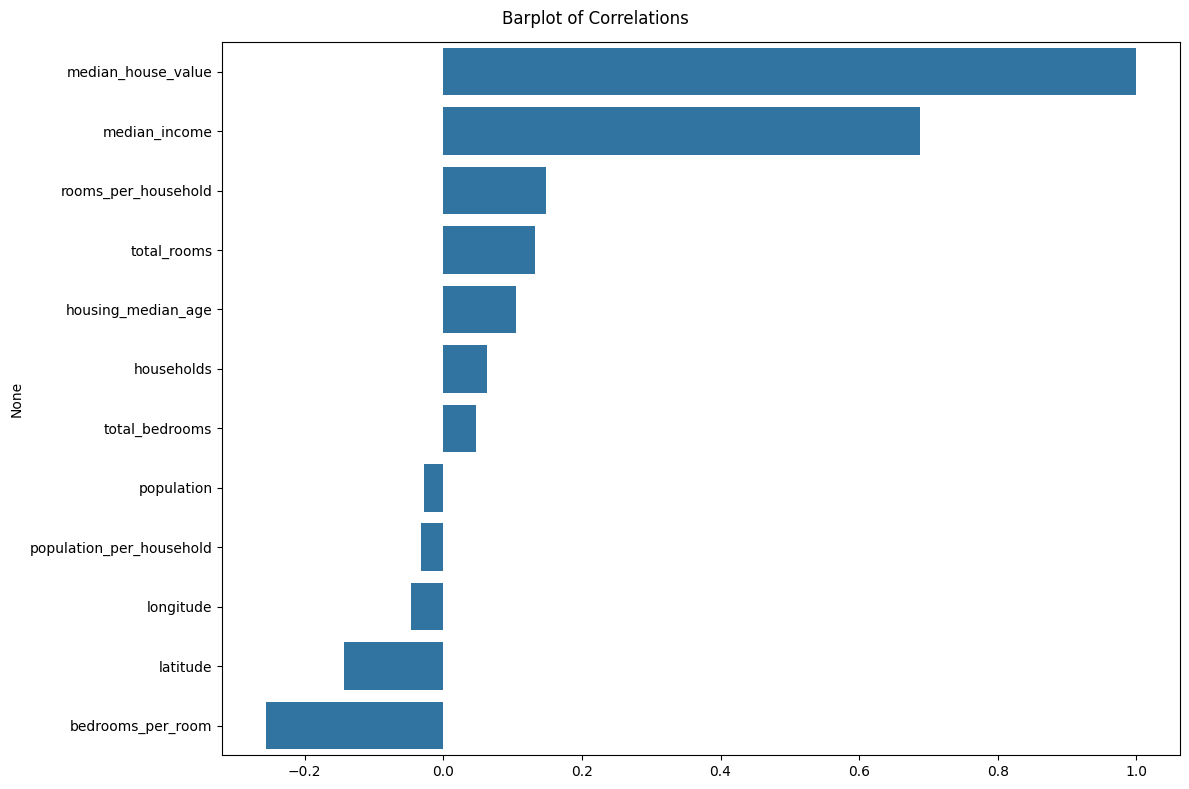

In [22]:
plt.figure(figsize=(12,8))
sns.barplot(x = df.values, y = df.index)
plt.suptitle("Barplot of Correlations")
plt.tight_layout()
plt.show()